# Importing Libraries

In [503]:
#importing the necessary libraries

import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, RANSACRegressor, TheilSenRegressor, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import plot_acf

In [504]:
df = pd.read_csv("USA_Housing.csv")

In [505]:
df.shape

(5000, 7)

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [507]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [508]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [509]:
rounder = lambda a: [round(x,2) for x in a]

In [510]:
df["Price"] = rounder(df.Price)

In [511]:
df.drop("Address", axis = 1, inplace = True)

In [512]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1059033.56
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1505890.91
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1058987.99
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1260616.81
4,59982.197226,5.040555,7.839388,4.23,26354.109472,630943.49


In [513]:
df = df.sample(frac = 1).reset_index().drop("index",axis=1) #sampling the data

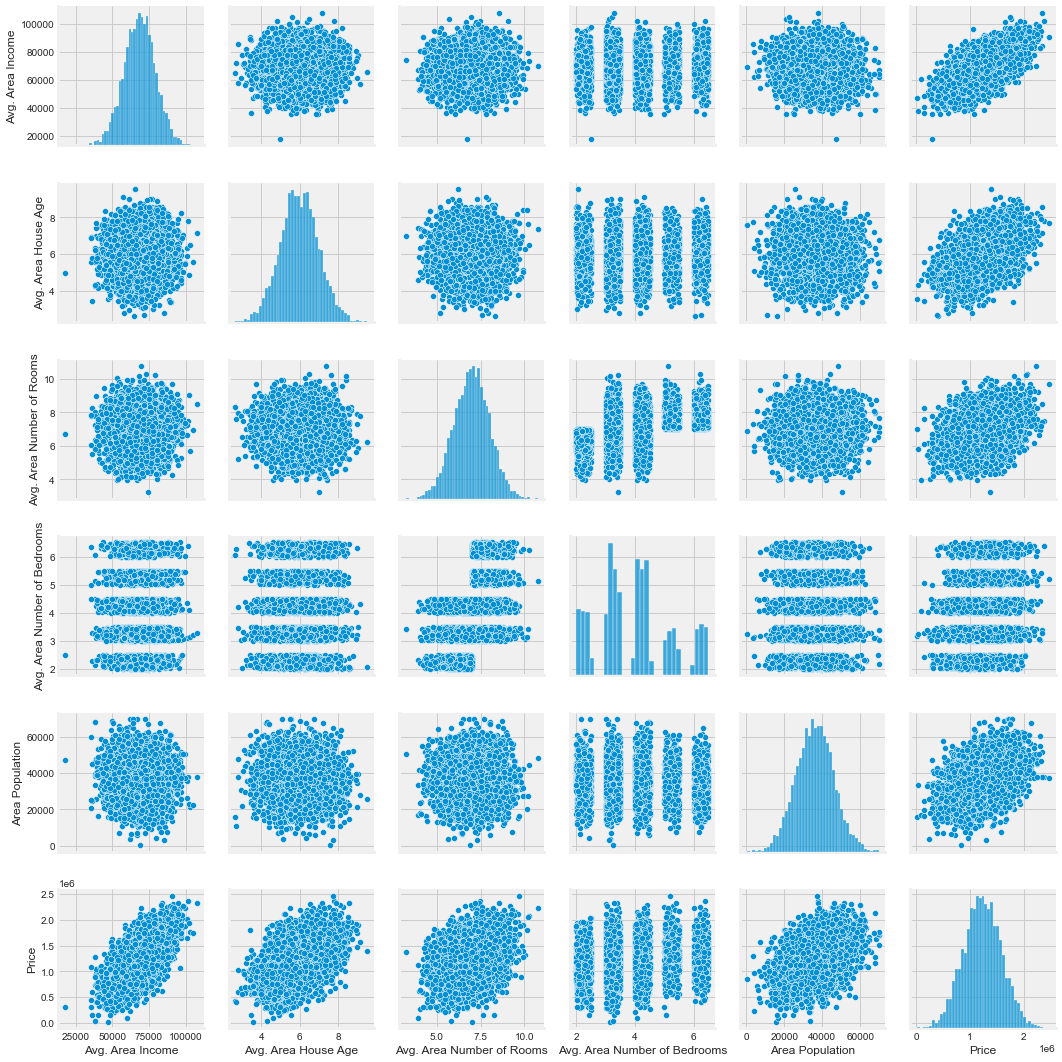

In [514]:
sns.pairplot(df)

In [515]:
col = df.columns

# Cumulative Distribution Plot

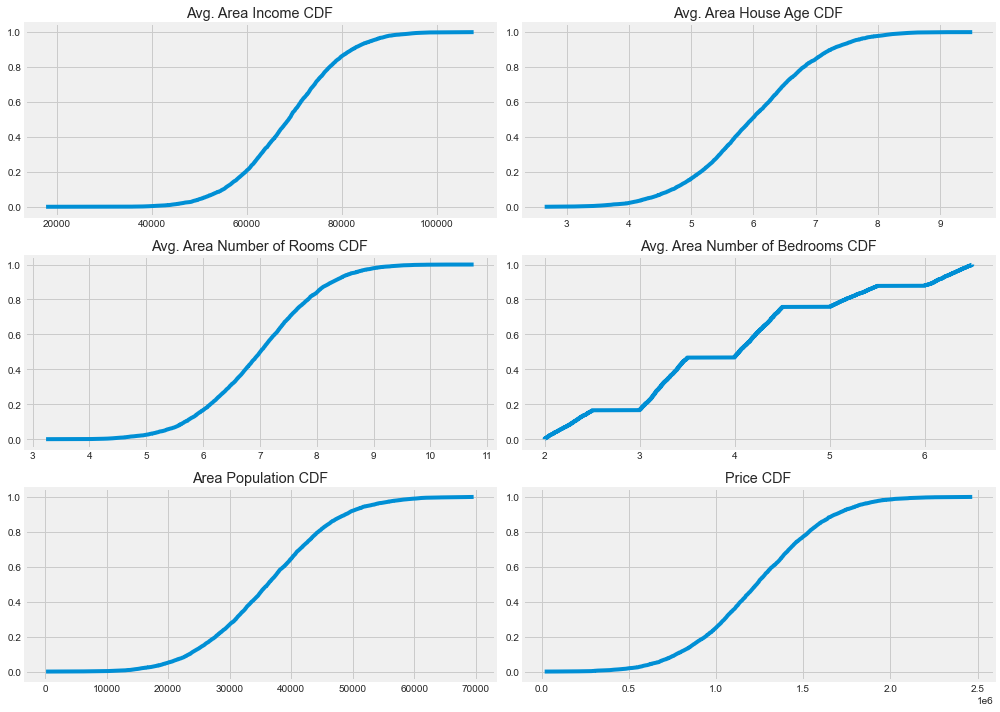

In [516]:
#plotting the cumulative distribution of the data

plt.figure(figsize=(14,10))
plt.subplot(321)
ecdf_1 = ECDF(df[col[0]])
plt.title(col[0] + " CDF")
plt.plot(ecdf_1.x, ecdf_1.y)
plt.subplot(322)
ecdf_2 = ECDF(df[col[1]])
plt.title(col[1] + " CDF")
plt.plot(ecdf_2.x, ecdf_2.y)
plt.subplot(323)
ecdf_3 = ECDF(df[col[2]])
plt.title(col[2] + " CDF")
plt.plot(ecdf_3.x, ecdf_3.y)
plt.subplot(324)
ecdf_4 = ECDF(df[col[3]])
plt.title(col[3] + " CDF")
plt.plot(ecdf_4.x, ecdf_4.y)
plt.subplot(325)
ecdf_5 = ECDF(df[col[4]])
plt.title(col[4] + " CDF")
plt.plot(ecdf_5.x, ecdf_5.y)
plt.subplot(326)
ecdf_6 = ECDF(df[col[5]])
plt.title(col[5] + " CDF")
plt.plot(ecdf_6.x, ecdf_6.y)
plt.tight_layout()

# Outlier Analysis

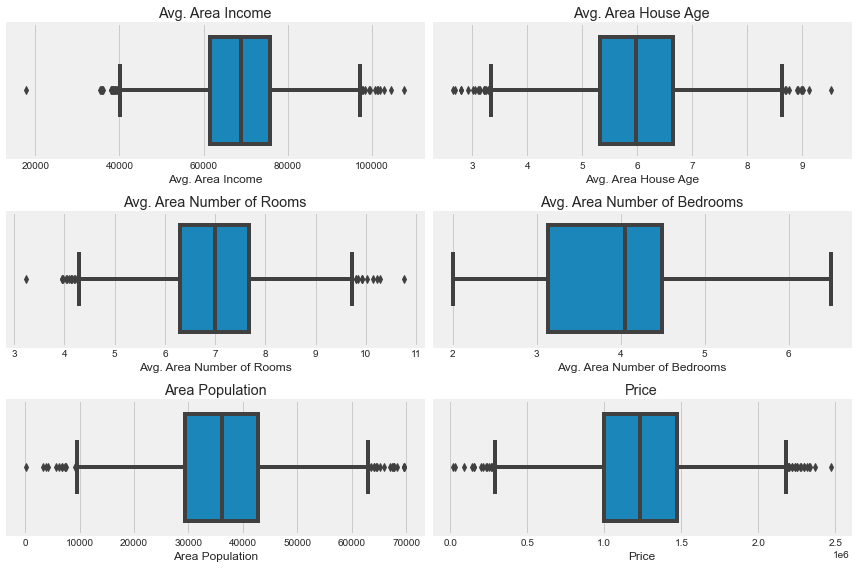

In [517]:
fig, ax = plt.subplots(3,2, figsize=(12,8))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, j in enumerate(df.columns):
    g = sns.boxplot(x = df[j], ax = axes_[i])
    g.set_title(j)
    plt.tight_layout()

Here we can some potential outliers present in our data except the Avg. Area Number of Bedrooms. Now we have to decide whether we should ignore this outliers or let it be in our model so before going into any conclusion, we will first investigate these extreme values first to make any conclusion.

In [518]:
df.describe(percentiles = [0.001,0.01, 0.1, 0.25, 0.50, 0.75, 0.95, 0.99])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
0.1%,36100.307113,3.004635,4.049299,2.000000,6248.234809,1.520713e+05
1%,43792.673024,3.648537,4.620750,2.020000,13983.282591,4.049730e+05
10%,55047.633980,4.697755,5.681951,2.310000,23502.845262,7.720318e+05
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06


In [519]:
def check_outliers(data, col):
    
    #calculating quantiles
    q25 = data[col].quantile(q = 0.25)
    q75 = data[col].quantile(q = 0.75)
    
    #calculating inter quantile range
    iqr = q75-q25
    
    #calculating upper_bound and lower_bound
    lower_bound = q25 - (1.5*iqr)
    upper_bound = q75 + (1.5*iqr)
    
    #filtering out outliers....!!!!!
    outliers = data[col][(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    print("**** Printing Outliers Result ****")
    
    print("\nTotal Outliers Present in the Data: %s"%(len(outliers)))
    
    #plotting the line plot result
    plt.figure(figsize=(10,10))
    plt.subplot(211)
    plt.plot(data[col])
    plt.title(col + " with Outliers")
    plt.scatter(x = outliers.index, y = outliers.values, marker = "X", color = 'r', s = 100)
    
    #plotting the box plot result
    plt.subplot(212)
    plt.title(col + " After Removing Extreme Values")
    filter_data = data[col][~(data[col].isin(outliers))]    
    sns.boxplot(filter_data)

**** Printing Outliers Result ****

Total Outliers Present in the Data: 35


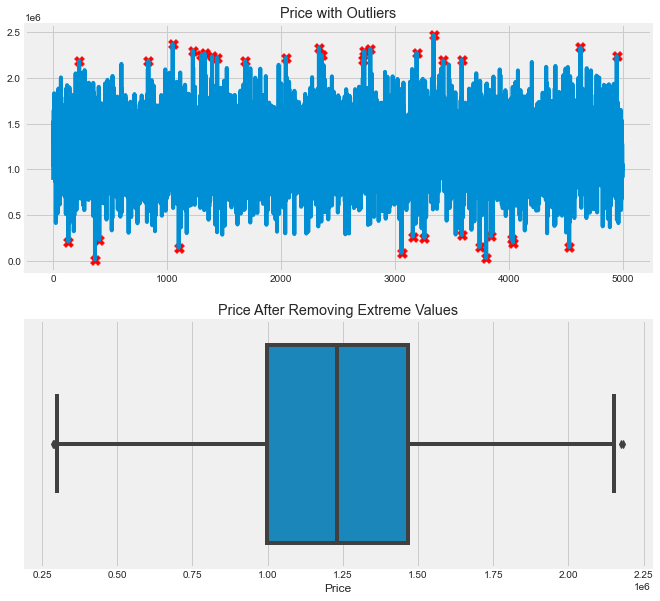

In [520]:
check_outliers(df, col[5])

After removing the outliers we can see our data become more stables so what we can do instead or removing or imputing we will apply technique called winsorization in which we cap the lower and upper extreme values using quantiles.

In [521]:
from scipy.stats.mstats import winsorize

In [522]:
df_copy = df.copy()

### Winsorization

In [523]:
def apply_winsorize(data, col):
    winsorize(data[col], limits = [0.005, 0.005], inplace = True)

In [524]:
#performing winsorization using scipy to remove the effect of extreme values

for i, j in df.items():
    apply_winsorize(df_copy, i)

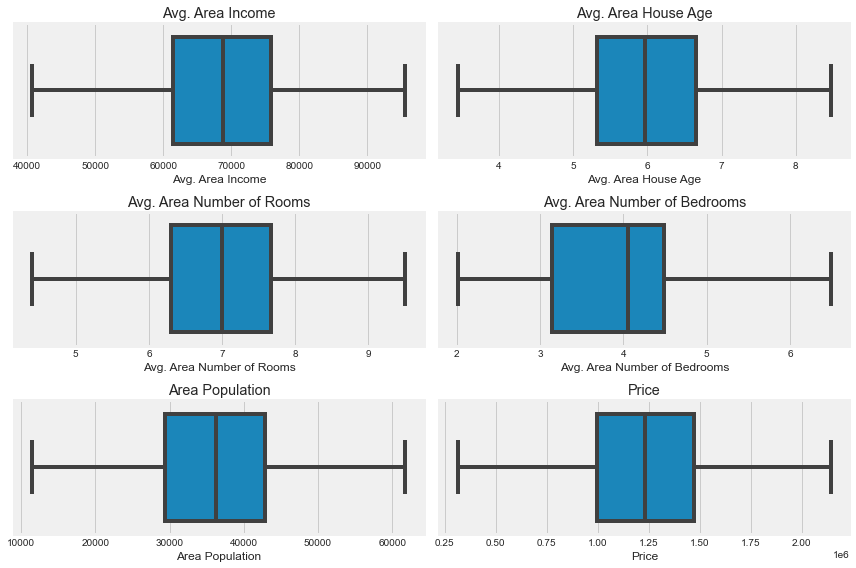

In [525]:
fig, ax = plt.subplots(3,2, figsize=(12,8))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, j in enumerate(df.columns):
    g = sns.boxplot(x = df_copy[j], ax = axes_[i])
    g.set_title(j)
    plt.tight_layout()

In [526]:
X = df_copy.iloc[:, :-1]
y = df_copy.iloc[:, -1]

In [527]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,46737.598011,4.886380,8.172473,6.41,42351.303628
1,73367.045991,6.173291,9.054710,5.25,23684.787951
2,63409.976793,5.767623,6.087209,4.08,56256.982032
3,79248.642455,6.002900,6.730821,3.09,40173.072174
4,71601.641055,6.066999,7.249905,4.24,34787.465372


In [528]:
y.head()

0     885661.59
1    1521730.79
2    1369582.58
3    1505890.91
4    1289201.39
Name: Price, dtype: float64

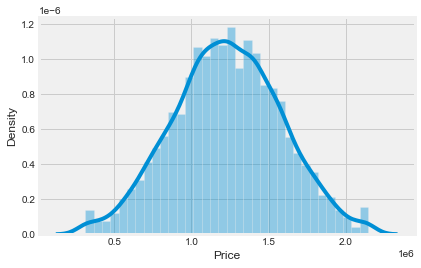

In [529]:
sns.distplot(y)

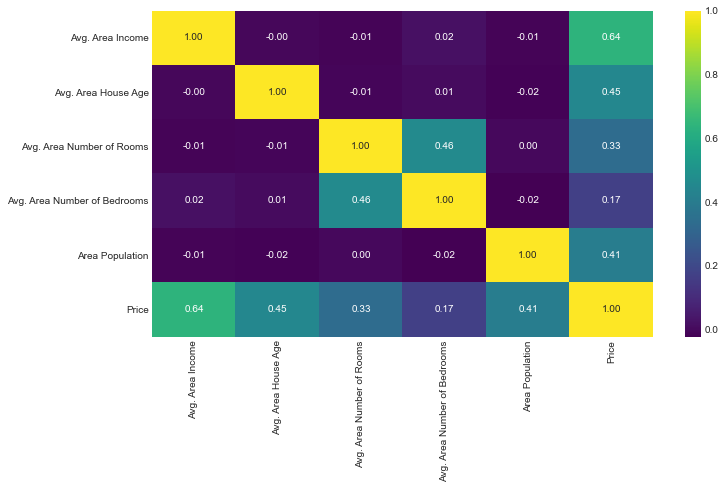

In [530]:
plt.figure(figsize=(10,6))
sns.heatmap(df_copy.corr(), annot = True, fmt = '.2f', cmap = 'viridis')

In [531]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [532]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 5)
(1500, 5)
(3500,)
(1500,)


# Sklearn Pipeline

In [533]:
# Testing Different Regression Algorithms to choose the best one

lr_pipeline = Pipeline([("scaler", StandardScaler()), ("linear_regression", LinearRegression())])
rb_pipeline = Pipeline([("scaler", StandardScaler()), ("robust_regression", RANSACRegressor(random_state = 42))])
thiel_pipeline = Pipeline([("scaler", StandardScaler()), ("thiel_regressor", TheilSenRegressor(random_state = 42))])
ridge_pipeline = Pipeline([("scaler", StandardScaler()), ("ridge_regressor", Ridge(random_state = 42))])
lasso_pipeline = Pipeline([("scaler", StandardScaler()), ("lasso_regressor", Lasso(random_state = 42))])
elastic_pipeline = Pipeline([("scaler", StandardScaler()), ("elastic_net", ElasticNet(random_state = 42))])
random_forest_pipeline = Pipeline([("scaler", StandardScaler()), ("randomforest_regression", RandomForestRegressor(random_state = 42))])
xgboost_pipeline = Pipeline([("scaler", StandardScaler()), ("xgboost_regression", XGBRegressor())])
adaboost_pipeline = Pipeline([("scaler", StandardScaler()), ("adaboost_regression", AdaBoostRegressor(random_state = 42))])
gradient_pipeline = Pipeline([("scaler", StandardScaler()), ("gradientboost_regression", GradientBoostingRegressor(random_state = 42))])
lightgbm_pipeline = Pipeline([("scaler", StandardScaler()), ("lightgbm_regression", LGBMRegressor(random_state = 42))])
catboost_pipeline = Pipeline([("scaler", StandardScaler()), ("catboost_regression", CatBoostRegressor(random_state = 42, silent = True))])
decisiontree_pipeline = Pipeline([("scaler", StandardScaler()), ("decisiontree_regression", DecisionTreeRegressor(random_state = 42))])
knn_pipeline = Pipeline([("scaler", StandardScaler()), ("knn_regression", KNeighborsRegressor())])
sgc_pipeline = Pipeline([("scaler", StandardScaler()), ("sgd_regression", SGDRegressor(random_state = 42))])

In [534]:
pipelines = [lr_pipeline, rb_pipeline, thiel_pipeline, ridge_pipeline, lasso_pipeline,
            elastic_pipeline, random_forest_pipeline, xgboost_pipeline, adaboost_pipeline, gradient_pipeline, lightgbm_pipeline, catboost_pipeline, decisiontree_pipeline, knn_pipeline, sgc_pipeline]

In [535]:
pipe_dict = {0: "Linear Regression", 1: "Robust", 2: "Theil Sen", 3: "Ridge",
            4: "Lasso", 5: "ElasticNet", 6: "RandomForest", 7: "XGBoost",
             8: "Adaboost", 9: "GradientBoost", 10: "LightGBM", 11: "CatBoost", 12: "Decision Tree", 13: "KNN", 14: "SGD"}

In [536]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])

In [537]:
for i, pipe in enumerate(pipelines):
    score = cross_val_score(pipe, X, y, cv = 10)
    print(pipe_dict[i], ": ", score.mean())

Linear Regression :  0.9152996722264163
Robust :  0.9109284826218745
Theil Sen :  0.9150974871396537
Ridge :  0.9152997023954166
Lasso :  0.9152996729304507
ElasticNet :  0.8101814860082422
RandomForest :  0.887090051145439
XGBoost :  0.8807771680151382
Adaboost :  0.8287362366566124
GradientBoost :  0.9033789670885153
LightGBM :  0.9005872050098385
CatBoost :  0.9082788833460045
Decision Tree :  0.755666073026088
KNN :  0.8697129057434158
SGD :  0.9152713773460046


Based on the above cross validation, we can see that **Linear Regression**, **Theil Sen Regressor**, **Ridge**, **Lasso**, **Stochastic Gradient Descent** works best among the all. But for our model, we will be going to choose **Linear Regression**, **Ridge** & **Lasso** Regression Models to perform hyperparameter tuning to find the best model among three.

# Cross Validation - Randomized Search CV

In [538]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", LinearRegression())])

In [539]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [540]:
grid_params = [
    {"classifier": [LinearRegression()],
    "classifier__normalize": [True, False]},
    {"classifier": [Ridge()],
     "classifier__alpha": np.arange(0.5, 5, 0.25),
     "classifier__fit_intercept": [True, False],
     "classifier__normalize": [True, False],
     "classifier__max_iter": [50, 100, 500, 1000, 2500],
     "classifier__tol": [0.001, 0.01, 0.05, 0.1, 1, 5, 10],
     "classifier__solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg,", "sag", "saga"]
    },
    {"classifier": [Lasso()],
    "classifier__alpha": np.arange(0.5, 5, 0.25),
    "classifier__fit_intercept": [True, False],
    "classifier__normalize": [True, False],
    "classifier__max_iter": [50, 100, 500, 1000, 2500],
    "classifier__tol": [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10],
    "classifier__warm_start": [True, False],
    "classifier__positive": [True, False],
    "classifier__selection": ["cyclic", "random"]}
]

In [541]:
random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 8, verbose = 10, random_state = 42)

In [542]:
best_model = random_search.fit(X_train, y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1781s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0757s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    9.5s finished


In [543]:
best_model.best_params_

{'classifier__warm_start': True,
 'classifier__tol': 0.0001,
 'classifier__selection': 'cyclic',
 'classifier__positive': True,
 'classifier__normalize': True,
 'classifier__max_iter': 50,
 'classifier__fit_intercept': True,
 'classifier__alpha': 1.25,
 'classifier': Lasso(alpha=1.25, max_iter=50, normalize=True, positive=True, warm_start=True)}

In [544]:
pipeline_lasso = Pipeline([('scaler', StandardScaler()), ('lasso_reg', Lasso(alpha = 1.25, fit_intercept=True, max_iter=50, normalize=True, tol = 0.0001, warm_start = True, selection = 'cyclic', positive = True))])

In [545]:
model = pipeline_lasso.fit(X_train, y_train)

In [546]:
predict = model.predict(X_test)

In [547]:
resid = (y_test - predict)

# Prediction Diagnosis

In [548]:
def print_evaluate(true, prediction):
    mae = mean_absolute_error(true, prediction)
    mse = mean_squared_error(true, prediction)
    rmse = np.sqrt(mean_squared_error(true, prediction))
    r2_square = r2_score(true, prediction)

    print("MAE: {}".format(mae))
    print("MSE: {}".format(mse))
    print("RMSE: {}".format(rmse))
    print("R2 Square: {}".format(r2_square))

In [549]:
def plot_diag(true, prediction):
    
    #residuals
    resid = (true-prediction)
    
    #plotting the distplot
    plt.figure(figsize=(14,8))
    plt.subplot(221)
    plt.title("Distplot")
    sns.distplot(resid)
    
    #plotting the residual plot
    plt.subplot(222)
    plt.title("Residual Plot")
    sns.scatterplot(prediction, resid)
    sns.lineplot([min(prediction), max(prediction)], y = [0,0], linestyle = '--', color = 'r')
    
    #plotting the quantile plot
    ax = plt.subplot(223)
    plt.title("Quantile Plot")
    sm.qqplot(resid, line = 'r', ax = ax)
    
    #plotting the autocorrelation plot
    ax2 = plt.subplot(224)
    plt.title("Autocorrelation Plot")
    plot_acf(resid, ax = ax2)
    plt.tight_layout()

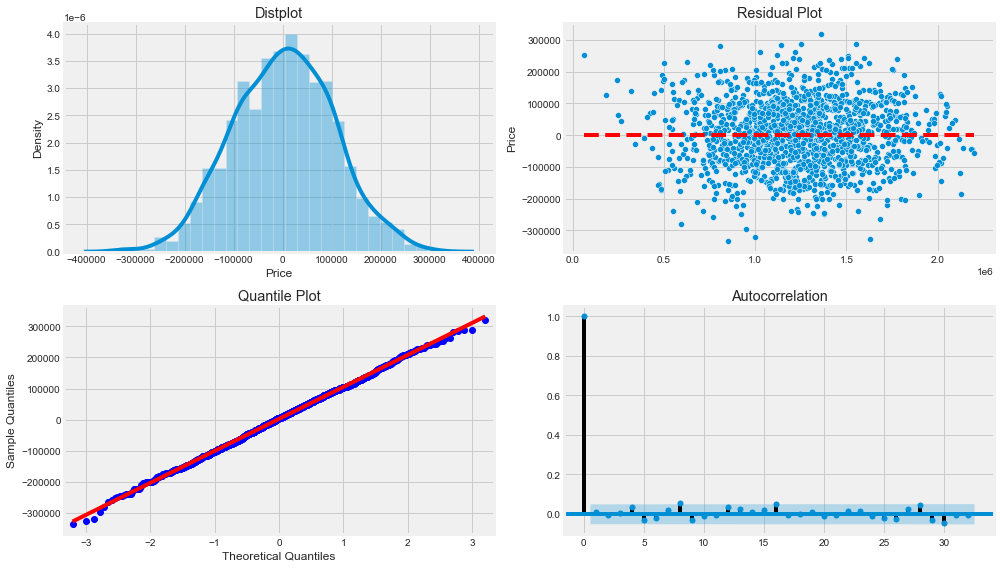

In [550]:
plot_diag(y_test, predict)

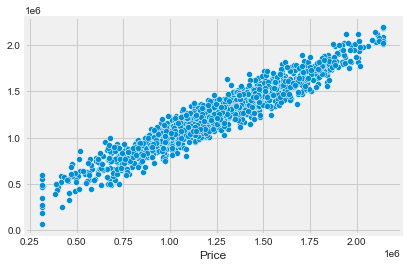

In [552]:
sns.scatterplot(y_test, predict)

In [553]:
print_evaluate(y_test, predict)

MAE: 82261.9392218934
MSE: 10448397470.435865
RMSE: 102217.40297246778
R2 Square: 0.9165953575438408


In [556]:
X_test["Predicted Price"] = predict

In [558]:
X_test["Original Price"] = y_test

In [560]:
X_test["Predicted Price"] = rounder(X_test["Predicted Price"])

In [561]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Predicted Price,Original Price
1501,95603.929480,5.960820,6.606164,2.46,39915.656778,1819689.01,1969194.12
2586,65041.691306,6.202875,6.088335,4.17,14486.825952,752132.56,759799.88
2653,69799.151976,5.684122,5.966318,4.14,38340.731396,1120106.73,1152798.58
1055,75049.036716,4.709070,7.623703,6.45,28061.996492,1119283.66,1199618.94
705,63630.607795,5.414388,7.390197,5.17,23129.116274,882875.54,933306.29
...,...,...,...,...,...,...,...
3563,70126.149946,6.263151,7.550649,5.26,33017.586058,1333887.71,1270963.56
1538,84474.160056,6.970855,5.935909,2.47,38677.815153,1646598.68,1739893.56
1837,78482.228893,7.030043,6.641954,3.33,28452.314843,1457136.23,1367619.92
2380,65614.784873,5.343725,7.610386,6.49,39353.683932,1191983.99,1222045.09


## I hope you like this notebook...!!!!!